In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from nltk.stem.porter import *
from gensim.models import Word2Vec,KeyedVectors
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from spellchecker import SpellChecker

In [3]:
pwd

'C:\\Data Science\\Jupyter Notebook\\GitHackathon\\Notebooks'

In [4]:
df=pd.read_csv('../data/raw/train.csv')

In [5]:
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [6]:
cdf=df.copy()

In [7]:
cdf.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [8]:
cdf.shape

(7274, 3)

In [9]:
cdf.describe()

,tweet_id,sentiment
count,7274.000000,7274.000000
mean,4531.736871,1.299148
std,2617.858745,0.607829
min,2.000000,0.000000
25%,2261.500000,1.000000
50%,4530.500000,1.000000
75%,6796.750000,2.000000
max,9092.000000,3.000000


In [10]:
cdf['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [11]:
texts = cdf['tweet'].tolist()

In [12]:
texts

['#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller',
 'Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw',
 'one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}',
 "This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork",
 'Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}',
 '#technews One lone dude awaits iPad 2 at Apple\x89Ûªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech',
 'SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad',
 'NU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable',
 'Free #SXSW sampler on iTunes {link} #FreeMusic',
 'I think I might go a

In [13]:
cdf_lower = cdf['tweet'].str.lower()

In [14]:
cdf_lower

0       #sxswnui #sxsw #apple defining language of tou...
1       learning ab google doodles! all doodles should...
2       one of the most in-your-face ex. of stealing t...
3       this iphone #sxsw app would b pretty awesome i...
4       line outside the apple store in austin waiting...
                              ...                        
7269    @mention google plze tammi.  i'm in middle of ...
7270    rt @mention ÷¼ are you all set? ÷_ {link} ÷...
7271    rt @mention aha! found proof of lactation room...
7272    we just launched our ipad app at #sxsw! get al...
7273    the next fin serv battle is vs apple, goog, mo...
Name: tweet, Length: 7274, dtype: object

In [15]:
alphanumeric=['' for i in range(7274)]

for i in range(7274):
    a_string = cdf_lower[i]
    if type(a_string)!=float:
        for character in a_string:
            if character.isalnum():
                alphanumeric[i] += character
            elif character ==" ":
                alphanumeric[i] +=character
alphanumeric

['sxswnui sxsw apple defining language of touch with different dialects becoming smaller',
 'learning ab google doodles all doodles should be light funny amp innovative with exceptions for significant occasions googledoodle sxsw',
 'one of the most inyourface ex of stealing the show in yrs rt mention quotat sxsw apple schools the mkt expertsquot  link',
 'this iphone sxsw app would b pretty awesome if it didnt crash every 10mins during extended browsing fuckit illmakeitwork',
 'line outside the apple store in austin waiting for the new ipad sxsw  link',
 'technews one lone dude awaits ipad 2 at appleûªs sxsw store link technews apple ipad2 sxsw tablets tech',
 'sxsw tips prince npr videos toy shopping with zuckerberglink  sxsw  ipad',
 'nu user rt mention new ubersocial for iphone now in the app store includes uberguide to sxsw sponsored by mashable',
 'free sxsw sampler on itunes link freemusic',
 'i think i might go all weekend without seeing the same ipad case twice sxsw',
 'rt ment

In [16]:
type(alphanumeric)

list

In [17]:
tokenized_sents = [word_tokenize(i) for i in alphanumeric]
tokenized_sents

[['sxswnui',
  'sxsw',
  'apple',
  'defining',
  'language',
  'of',
  'touch',
  'with',
  'different',
  'dialects',
  'becoming',
  'smaller'],
 ['learning',
  'ab',
  'google',
  'doodles',
  'all',
  'doodles',
  'should',
  'be',
  'light',
  'funny',
  'amp',
  'innovative',
  'with',
  'exceptions',
  'for',
  'significant',
  'occasions',
  'googledoodle',
  'sxsw'],
 ['one',
  'of',
  'the',
  'most',
  'inyourface',
  'ex',
  'of',
  'stealing',
  'the',
  'show',
  'in',
  'yrs',
  'rt',
  'mention',
  'quotat',
  'sxsw',
  'apple',
  'schools',
  'the',
  'mkt',
  'expertsquot',
  'link'],
 ['this',
  'iphone',
  'sxsw',
  'app',
  'would',
  'b',
  'pretty',
  'awesome',
  'if',
  'it',
  'didnt',
  'crash',
  'every',
  '10mins',
  'during',
  'extended',
  'browsing',
  'fuckit',
  'illmakeitwork'],
 ['line',
  'outside',
  'the',
  'apple',
  'store',
  'in',
  'austin',
  'waiting',
  'for',
  'the',
  'new',
  'ipad',
  'sxsw',
  'link'],
 ['technews',
  'one',
  'l

In [18]:
stop_words = set(stopwords.words('english')) 

In [19]:
type(tokenized_sents)

list

In [20]:
# Use list comprehension to convert a list of lists to a flat list 
flatList = [ item for elem in tokenized_sents for item in elem]
print('Flat List : ', flatList)         

Flat List :  ['sxswnui', 'sxsw', 'apple', 'defining', 'language', 'of', 'touch', 'with', 'different', 'dialects', 'becoming', 'smaller', 'learning', 'ab', 'google', 'doodles', 'all', 'doodles', 'should', 'be', 'light', 'funny', 'amp', 'innovative', 'with', 'exceptions', 'for', 'significant', 'occasions', 'googledoodle', 'sxsw', 'one', 'of', 'the', 'most', 'inyourface', 'ex', 'of', 'stealing', 'the', 'show', 'in', 'yrs', 'rt', 'mention', 'quotat', 'sxsw', 'apple', 'schools', 'the', 'mkt', 'expertsquot', 'link', 'this', 'iphone', 'sxsw', 'app', 'would', 'b', 'pretty', 'awesome', 'if', 'it', 'didnt', 'crash', 'every', '10mins', 'during', 'extended', 'browsing', 'fuckit', 'illmakeitwork', 'line', 'outside', 'the', 'apple', 'store', 'in', 'austin', 'waiting', 'for', 'the', 'new', 'ipad', 'sxsw', 'link', 'technews', 'one', 'lone', 'dude', 'awaits', 'ipad', '2', 'at', 'appleûªs', 'sxsw', 'store', 'link', 'technews', 'apple', 'ipad2', 'sxsw', 'tablets', 'tech', 'sxsw', 'tips', 'prince', 'npr',

In [21]:
filtered_sentence = [w for w in flatList if not w in stop_words]
print(filtered_sentence)

['sxswnui', 'sxsw', 'apple', 'defining', 'language', 'touch', 'different', 'dialects', 'becoming', 'smaller', 'learning', 'ab', 'google', 'doodles', 'doodles', 'light', 'funny', 'amp', 'innovative', 'exceptions', 'significant', 'occasions', 'googledoodle', 'sxsw', 'one', 'inyourface', 'ex', 'stealing', 'show', 'yrs', 'rt', 'mention', 'quotat', 'sxsw', 'apple', 'schools', 'mkt', 'expertsquot', 'link', 'iphone', 'sxsw', 'app', 'would', 'b', 'pretty', 'awesome', 'didnt', 'crash', 'every', '10mins', 'extended', 'browsing', 'fuckit', 'illmakeitwork', 'line', 'outside', 'apple', 'store', 'austin', 'waiting', 'new', 'ipad', 'sxsw', 'link', 'technews', 'one', 'lone', 'dude', 'awaits', 'ipad', '2', 'appleûªs', 'sxsw', 'store', 'link', 'technews', 'apple', 'ipad2', 'sxsw', 'tablets', 'tech', 'sxsw', 'tips', 'prince', 'npr', 'videos', 'toy', 'shopping', 'zuckerberglink', 'sxsw', 'ipad', 'nu', 'user', 'rt', 'mention', 'new', 'ubersocial', 'iphone', 'app', 'store', 'includes', 'uberguide', 'sxsw', 

In [22]:
len(filtered_sentence)

89723

In [43]:
# tokens is a list of all tokens in corpus
freq_dist = nltk.FreqDist(filtered_sentence)
freq_dist


FreqDist({'sxsw': 7508, 'mention': 5512, 'link': 3380, 'rt': 2344, 'ipad': 1911, 'google': 1860, 'apple': 1727, 'iphone': 1214, 'store': 1188, 'new': 862, ...})

In [76]:
freq_df = pd.DataFrame(pd.DataFrame(freq_dist,index=range(0,len(freq_dist))).iloc[0,:].sort_values(ascending=False)[:15])
freq_df.columns = ['freq']
freq_df

,freq
sxsw,7508
mention,5512
link,3380
rt,2344
ipad,1911
google,1860
apple,1727
iphone,1214
store,1188
new,862


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency')

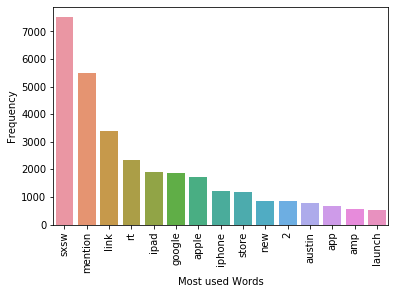

In [80]:
sns.barplot(x=freq_df.index,y=freq_df['freq'])
plt.xticks(rotation=90)
plt.xlabel('Most used Words')
plt.ylabel('Frequency')

In [24]:
final_list = list(set(filtered_sentence))
final_list
    

['laptop',
 'notes',
 'draws',
 'pepsi',
 'surface',
 'worked',
 'numbassonfloor',
 'taxi',
 'tronlegacy',
 'battelle',
 'vuelta',
 'recovery',
 'sxsma',
 'antwoord',
 '8am',
 'cheatday',
 'robots',
 'tsunamis',
 'partial',
 '2nd',
 'waffling',
 'wholistic',
 'earns',
 'attached',
 'nowsxsw',
 'redeem',
 'mtheatlanticcomtechnologyarchive201103applesetsuptemporarymegastoreatsxsw72296',
 'relationship',
 '1230pm',
 'night',
 'attendeesyou',
 'relies',
 'ridculous',
 'back',
 'quake',
 'female',
 'evaporation',
 'atomic',
 'outsold',
 'could',
 'ebayamazongoogle',
 'valley',
 '6quot',
 'collecting',
 'cope',
 'questions',
 'checkinthing',
 'purchasers',
 'monster',
 'sxsw500',
 'sxnewworlds',
 'messing',
 'loving',
 'parents',
 'selling',
 'newsworthy',
 'lmndst',
 'sa',
 'whatcha',
 'ipaded',
 'shouldnt',
 'tapworthy',
 'gibson',
 'thwarted',
 'pumped',
 'program',
 'hive',
 'startup',
 'patry',
 'swonderlin',
 'corner',
 'rwwtof6bcet',
 'settling',
 'soo',
 'atleast',
 'gasps',
 'compan

In [25]:
len(final_list)

9870

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(final_list)

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

unjobsaesthetic
{'unjobsaesthetic'}
dtphcomû
{'dtphcomû'}
vidcamera
{'vidcamera'}
bgs
{'mgs', 'bgs', 'sgs', 'lgs', 'kgs', 'egs', 'igs', 'ngs', 'gs'}
walton
{'ralston', 'balston', 'alston', 'walton', 'dalston'}
lovemusicapi
{'lovemusicapi'}
removeburn
{'removeburn'}
am
{'bam', 'beam', 'tham', 'zam', 'siam', 'loam', 'qram', 'sam', 'exam', 'noam', 'quam', 'azam', 'fram', 'kiam', 'cham', 'adam', 'ram', 'vsam', 'tam', 'gram', 'cam', 'wham', 'sram', 'flam', 'tuam', 'ham', 'guam', 'scam', 'alam', 'hyam', 'clam', 'slam', 'spam', 'oram', 'bram', 'byam', 'roam', 'sham', 'team', 'aram', 'lam', 'pham', 'glam', 'dam', 'ream', 'fam', 'tmam', 'dram', 'pram', 'edam', 'eyam', 'liam', 'mam', 'am', 'ywam', 'swam', 'yam', 'isam', 'jam', 'pam', 'cram', 'tram', 'seam', 'foam', 'nam', 'kam', 'imam'}
numbassonfloor
{'numbassonfloor'}
wristband
{'wristband'}
douchebaggery
{'douchebaggery'}
highfiving
{'highfiving'}
tronlegacy
{'tronlegacy'}
android
{'android'}
delta
{'vesta', 'delta', 'cuesta', 'quetta', 'volt

Lemmatization

In [ ]:
#initialise word lematizer
lemmatizer = WordNetLemmatizer()

for i in range(9870):
    print(lemmatizer.lemmatize(final_list[i]))
    
    


Stemming

In [ ]:
ps=PorterStemmer()

In [ ]:
for i in range(9870):
    print(ps.stem(final_list[i]))

Spell Correction

In [ ]:
bow_1 = df['tweet'].apply(lambda x:word_tokenize(str(x)))
print(bow_1)

In [ ]:
bow_2 = []
for i in bow_1:
    bow_2.append(i)
bow_2

In [ ]:
bow_3 = []
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            bow_3.append(i)
reemovNestings(bow_2)
bow_3

In [ ]:
# Bow_final has all unique words of tweets ready to be converted into features for ML Model.

bow_final = list(set(bow_3))
bow_final

In [25]:
len(bow_final)

11938

In [22]:
without_special_char=list(filter(lambda x:x, map(lambda x:re.sub(r'[^A-Za-z]', '', x), bow_final)))

In [23]:
without_special_char

['inferior',
 'quick',
 'hope',
 'mm',
 'Deck',
 'ireport',
 'AugmentedReality',
 'virginity',
 'level',
 'pics',
 'Interview',
 'Karateka',
 'client',
 'turns',
 'Vacation',
 'rescue',
 'Rest',
 'Beta',
 'than',
 'Hoping',
 'heal',
 'ur',
 'stribpol',
 'Bing',
 'Added',
 'every',
 'Compilation',
 'Script',
 'Adwords',
 'Space',
 'notes',
 'Fluffy',
 'broadcastr',
 'proving',
 'st',
 'Connect',
 'goal',
 'Contextual',
 'official',
 'Sugar',
 'Admission',
 'amigos',
 'WUT',
 'free',
 'conferences',
 'ubiquity',
 'screenscrape',
 'Doesnt',
 'PLAYSXSW',
 'Underwire',
 'tcokfNfQ',
 'highly',
 'flannel',
 'loyalty',
 'PubSubHubbub',
 'stylish',
 'above',
 'distorted',
 'WUT',
 'out',
 'iminfanboycentral',
 'geogames',
 'appointments',
 'trumping',
 'mae',
 'noniPhone',
 'keynote',
 'pr',
 'apply',
 'thick',
 'GWT',
 'freecreditscore',
 'Fascinating',
 'Fill',
 'eurorscg',
 'maybe',
 'horizon',
 'Gotto',
 'Taking',
 'sipping',
 'acquisition',
 'habit',
 'Email',
 'incorrect',
 'wacky',
 'TRO

Spell check

In [24]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(without_special_char)

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

beforetwitter
{'beforetwitter'}
guys
{'guys'}
weeks
{'seeks', 'gees', 'greeks', 'meeks', 'reeks', 'weeks', 'leeks', 'geek'}
hashing
{'hashing'}
hmi
{'hmi', 'hdm', 'hdi'}
pop-up
{'pop-up'}
report
{'report'}
alu
{'acl', 'acls', 'alu', 'actu'}
newandroid
{'newandroid'}
bodyaches
{'bodyaches'}
benmcgraw
{'benmcgraw'}
possibly
{'wobbly', 'polly', 'pebbly', 'poly', 'portly', 'nobly', 'posy', 'doubly', 'mostly', 'possibly', 'mosely', 'costly', 'bobbly', 'cosby', 'cosily', 'polsby', 'poorly', 'posey'}
bus
{'cous', 'c-bus', 'cpus', 'cbs', 'crus', 'bus', 'cubs', 'mbus', 'sbus'}
emma
{'emma', 'hama', 'pmma', 'umma', 'hmm', 'amma', 'hmmm'}
eatshopaustinapp
{'eatshopaustinapp'}
recs
{'recor', 'recs', 'repos', 'cecos', 'pecos'}
shhh
{'ahhhh', 'ohhhh', 'shhh'}
loch
{'loch', 'nock', 'nosh', 'noah', 'goch', 'nach', 'roch', 'coch', 'koch', 'hoch', 'nch', 'och', 'noth', 'enoch', 'notch', 'anoch', 'foch'}
gonna
{'goon', 'gonna', 'goons', 'poona', 'gooda'}
years
{'aaaaa', 'year', 'meana', 'seaga', 'yaga', 

webdoccom
{'webdoccom'}
payroll
{'payroll', 'mayall', 'pascall'}
artikelen
{'artikelen'}
hamsandwich
{'hamsandwich'}
relocation
{'relocation', 're-location'}
wiredcom
{'wiredcom'}
travelled
{'travelled'}
assistivetech
{'assistivetech'}
housecoat
{'housecoat'}
assure
{'assure'}
flicking
{'tricking', 'frisking', 'pricking', 'flicking'}
turnstones
{'turnstones'}
pds
{'pcx', 'pdf', 'pdr', 'pox', 'px', 'pbx', 'pyx', 'pd', 'pdc', 'pdt', 'dpx', 'pex', 'dx', 'pdg', 'pda', 'pdp', 'pax', 'pdb', 'pdq', 'pds', 'pdm'}
eatdrinktweet
{'eatdrinktweet'}
raidsxsw
{'raidsxsw'}
context
{'context'}
dailygrape
{'dailygrape'}
getjarsxsw
{'getjarsxsw'}
glowinthedark
{'glowinthedark'}
attis
{'battys', 'attis'}
tobeannounced
{'tobeannounced'}
elitebook
{'elitebook'}
bantu
{'bunte', 'bantu', 'runtu', 'bunty'}
dumbanddumber
{'dumbanddumber'}
kasbah
{'kasbah'}
sxswgood
{'sxswgood'}
teamandroid
{'teamandroid'}
xperiaplay
{'xperiaplay'}
mediators
{'diapers', 'mediators', 'mediates'}
outcast
{'outcast', 'outlast'}
ju

digibiz
{'digibiz'}
googleaclueff
{'googleaclueff'}
netflix
{'netflix'}
att
{'atn', 'aten', 'att.', 'atta', 'att', 'atte'}
kip
{'kip'}
ttp
{'ttp'}
carnmoney
{'carnmoney'}
was
{'whs', 'wfs', 'wis', 'wus', 'wcs', 'gks', 'wkts', 'was', "w's", 'wes', 'kws', 'ks', 'wvs', 'ws'}
query
{'query'}
spiderhouse
{'spiderhouse'}
googlesponsored
{'googlesponsored'}
schwa
{'schwab', 'schwa'}
bell
{'bulli', 'bello', 'bells', 'gelli', 'bell', 'belly', 'bella', 'belle', 'bellis'}
dead
{'deaden', 'daddy', 'leaded', 'dreaded', 'headed', 'dddd', 'dadda', 'beaded', 'dead', 'deadly', 'dadd'}
livetapp
{'livetapp'}
issue
{'esau', 'esme', 'esq', 'duque', 'mosque', 'basque', 'bisque', 'nque', 'masque', 'esq.', 'que', 'issue', 'ensue', 'pique', 'auque', 'rescue', 'roque', 'esquire', 'sequel', 'fescue', 'este', 'risque', 'esse', 'epoque', 'sue'}
people
{'people'}
tsotchke
{'tsotchke'}
musicviz
{'musicviz'}
wow
{'fwwg', 'ecwp', 'ewe', 'sw1w', 'ebbw', 'e.w.', 'ewen', 'wow', 'nuww', 'ewos', 'aww', 'wwf', 'ewan', 'ew',

{'doe', 'darne', 'roe', 'dirge', 'diro', 'dire', 'dafoe', 'dare', 'wroe', 'dore', 'dro', 'dere', 'drop', 'faroe', 'defoe', 'dorje', 'joe', 'darke', 'duroc', 'durie', 'drone', 'drove', 'dron', 'daro'}
categorized
{'categorized'}
rebels
{'rebels', 'rebel'}
start
{'strabo', 'sarfu', 'stab', 'stars', 'sarb', 'tarby', 'stark', 'starve', 'starch', 'stare', 'starry', 'starr', 'stared', 'startup', 'searby', 'starbuck', 'star', 'starky', 'starts', 'start', 'saru', 'stares', 'stabs', 'starke'}
webbrowsing
{'webbrowsing'}
goodies
{'goodies'}
frankeninterface
{'frankeninterface'}
win-win
{'win-win'}
kiiiiiilling
{'kiiiiiilling'}
celebrant
{'celebrant'}
makers
{'bakery', 'makers', 'maker'}
notsomuch
{'notsomuch'}
reform
{'deform', 'reform'}
ipadformatted
{'ipadformatted'}
booth
{'hookah', 'booth', 'loofah'}
sucks
{'sucks'}
moonlit
{'moonlit'}
freshbooks
{'freshbooks'}
marshall
{'mashad', 'mahal', 'marshal', 'mascall', 'washable', 'masham', 'masha', 'marshall'}
facebookkonkurrent
{'facebookkonkurren

{'showered'}
dig
{'dii', 'dili', 'diii', 'tigi', 'didi', 'gigi', 'digs', 'digit', 'divi', 'dini', 'dig'}
specify
{'sportif', 'notify', 'specify', 'spotty'}
mc
{'jac', 'mmc', 'fmc', 'bmc', 'jmp', 'mc', 'pmc', 'lmc', 'jmu', 'jcc', 'imc', 'jmb', 'emc', 'gmc', 'tmc', 'jvc', 'hmc', 'smc', 'cmc', 'wmc', 'jc', 'jma', 'jxc', 'rmc', 'vmc', 'jm'}
webb
{'webb'}
crazy
{'crazy'}
aha
{'ha-ha', 'haya', 'hama', 'hahn', 'naha', 'hana', 'aha', 'maha', 'hah', 'taha', 'hata'}
head-down
{'head-down'}
self-respecting
{'self-respecting'}
sure
{'sur', 'shrug', 'guruji', 'sirri', 'uri', 'strut', 'syrup', 'scrub', 'surat', 'suum', 'turpi', 'sura', 'yuri', 'suu', 'susu', 'sushi', 'puri', 'sueur', 'scrum', 'spru', 'gurus', 'nuri', 'fukui', 'shui', 'shrub', 'uruk', 'samui', 'sri', 'durum', 'sure', 'sulci', 'serum', 'burun', 'sarum', 'suki', 'surer', 'murli', 'rui', 'sari', 'guru', 'suzuki', 'burgi', 'seru', 'surf', 'seri', 'murti', 'sarup', 'saru', 'sufi', 'surya', 'surly', 'sulu', 'surge', 'sui', 'aurum', 'strum'

geekbeat
{'geekbeat'}
write-up
{'write-up'}
linked
{'linked'}
makeup
{'wake-up', 'makeup'}
bitlygmzb
{'bitlygmzb'}
contentrules
{'contentrules'}
punch-up
{'punch-up'}
imagelocationpersonalized
{'imagelocationpersonalized'}
marcisken
{'marcisken'}
tammy
{'tamm', 'tammy'}
acquainted
{'unacquainted', 'acquainted'}
further
{'futher', 'trumper', 'rutter', 'further', 'brother', 'trotter', 'truths', 'crusher', 'truer', 'trucker', 'tougher', 'tether', 'ruether', 'luther', 'rutger', 'truth', 'rather', 'thither', 'rother'}
appleshare
{'appleshare'}
javascript
{'javascript'}
bitlyetsbzk
{'bitlyetsbzk'}
macbookpro
{'macbookpro'}
wamnight
{'wamnight'}
byebyemoney
{'byebyemoney'}
rural
{'dougal', 'ducal', 'rural', 'brutal', 'duval', 'pupal', 'frugal', 'dual'}
sweetie
{'sweetie', 'tweedie'}
cocom
{'cocom'}
taking
{'taking'}
geekdate
{'geekdate'}
tbwasxsw
{'tbwasxsw'}
oh
{'vh', 'fn', 'ih', 'fv', 'dh', 'foh', 'fu', 'fk', 'uh', 'kh', 'mh', 'fx', 'wh', 'f6', 'fa', 'fs', 'f+', 'lh', 'f3', 'fy', 'f8', 'fc'

famille
{'famille', 'carville'}
nerdbird
{'nerdbird'}
real-estate
{'real-estate'}
wwwzaggleorg
{'wwwzaggleorg'}
nonmacbook
{'nonmacbook'}
tune-up
{'tune-up'}
malcom
{'milcom', 'malcom'}
lebanese
{'lebanese'}
net
{'binet', 'bent', 'net', 'bret', 'beet', 'cnet', 'bet', 'benet'}
mishmash
{'mishmash'}
us
{'urn', 'uars', 'ors', 'uis', 'uri', 'lrs', "u's", 'uns', 'ura', 'ers', 'ums', 'urr', 'uss', 'frs', 'ucs', 'ursu', 'ups', 'u.s', 'ure', 'hrs', 'urc', 'prs', 'rs', 'ours', 'crs', 'us', 'brs', 'uts', 'ur', 'furs', 'ubs', 'ursa', 'srs', 'urns', 'rus', 'mrs', 'irs', 'drs', 'nrs', 'ars', 'uos', 'yrs', 'urd'}
spazmatic
{'spazmatic'}
letushopenot
{'letushopenot'}
kwesi
{'kwesi'}
monetisation
{'monetisation'}
user
{'tsar', 'umar', 'usa.', 'usaf', 'usa', 'usair', 'ussr', 'user', 'sar'}
dustmen
{'dustmen', 'juster', 'justtext'}
taplynx
{'taplynx'}
streetview
{'streetview'}
schnur
{'schnur'}
minimalistprogramming
{'minimalistprogramming'}
wolframapp
{'wolframapp'}
maravilha
{'maravilha'}
fallback
{'f

{'marchmadness'}
imthetype
{'imthetype'}
washable
{'washable'}
packages
{'packages', 'backpacks', 'backpass'}
sendei
{'sendak', 'sendei'}
self-referential
{'self-referential'}
technics
{'techies', 'technics'}
citymarket
{'citymarket'}
right
{'light', 'sight', 'aught', 'right', 'bight', 'eight', 'tight', 'wight', 'might', 'night', 'alight', 'fight', 'aright'}
pop
{'pope', 'pops', 'pou', 'pop', 'ppu'}
iphonecharger
{'iphonecharger'}
ulster
{'custer', 'cluster', 'auster', 'buster', 'juster', 'fluster', 'lusher', 'bluster', 'duster', 'muster', 'lustre', 'lusted', 'lister', 'lyster', 'lester', 'ulster', 'ouster'}
cnaa
{'noaa', 'cnaa', 'nca', 'naa', 'caa'}
sxswpopup
{'sxswpopup'}
virtualoffice
{'virtualoffice'}
centaur
{'centaur'}
id
{'ied', 'isd', 'iod', "i'd", 'id', 'icd', 'ix', 'i.d', 'xd', 'ixi', 'iud', 'ild', 'ind'}
aids
{'aids', 'ias', 'iacs', 'ids', 'cads', 'fads', 'eads', 'dads', 'rads', 'ials', 'lads', 'wads', 'pads', 'iuds', 'ads'}
derbies
{'nebbins', 'netbios', 'derbies'}
text
{'t

socialgood
{'socialgood'}
hivethink
{'hivethink'}
evolvingworkplace
{'evolvingworkplace'}
bolinsxsw
{'bolinsxsw'}
finney
{'linnet', 'binney', 'linzey', 'finney', 'linley', 'pinney'}
recap
{'reaps', 'recap'}
payitforward
{'payitforward'}
smcomedyfyeah
{'smcomedyfyeah'}
winssxsw
{'winssxsw'}
poo
{'poo', 'ipos'}
wanker
{'wankers', 'wanker'}
tweetaholic
{'tweetaholic'}
sketchbookssharpie
{'sketchbookssharpie'}
pushsnowboarding
{'pushsnowboarding'}
latham
{'latham', 'lata'}
girl
{'iri', 'irb', 'crl', 'icl', 'ifl', 'ira', 'il', 'ire', 'brl', 'ir', 'irc', 'rl', 'irlr', 'irr', 'ill', 'irs', 'iro', 'girl', 'ilr', 'erl'}
doctor
{'oto', 'doth', 'doctor', 'goto', 'soto', 'doted', 'otto', 'dodo', 'doo', 'ditto', 'dato', 'botch', 'otc', 'dock', 'dptc', 'disco', 'doc', 'dot', 'douce', 'dtc', 'motto', 'draco', 'docs', 'atco', 'boto', 'deco', 'dote', 'dots', 'ditch', 'iosco', 'doggo', 'dutch', 'lotto', 'loco', 'dotty', 'toto', 'coco', 'soco', 'dotes', 'potto', 'rocco', 'notch', 'dolce', 'moto'}
cheeses

lightboxcom
{'lightboxcom'}
jordanhill
{'jordanhill'}
groans
{'groats', 'roars', 'groans', 'soars'}
stayingalive
{'stayingalive'}
futureoftouch
{'futureoftouch'}
goodlet
{'goodlet'}
finitude
{'finitude'}
sxswmobileapps
{'sxswmobileapps'}
billed
{'billie', 'billet', 'lillee', 'billed'}
ninian
{'lingua', 'irgun', 'lingus', 'airgun', 'ninian', 'mingus'}
windowsmobile
{'windowsmobile'}
kick
{'alick', 'click', 'blick', 'knick', 'flick', 'kick', 'lick', 'kluck', 'glick', 'slick'}
notsosecret
{'notsosecret'}
americanstatesman
{'americanstatesman'}
exogear
{'exogear'}
tinyurlcomgjmypj
{'tinyurlcomgjmypj'}
today
{'todays', 'today/', 'today'}
touch
{'touch'}
aww
{'aww'}
debating
{'debiting', 'debating'}
popping
{'pogodin', 'pepin', 'popping', 'pooling', 'chopin', 'poppins', 'pontin', 'pooper', 'pippin', 'poop', 'jospin', 'looping', 'papin', 'doolin', 'poplin'}
cover
{'cour', 'cove', 'cover', 'cvr', 'corr', 'cov', 'coir', 'cor'}
notforprofits
{'notforprofits'}
wave
{'raze', 'daze', 'wane', 'gaze'

{'roumat', 'roman', 'roomy', 'room', 'roma', 'rooms'}
street
{'street'}
angrybirds
{'angrybirds'}
sitesgooglecomsitefrontgatesxsw
{'sitesgooglecomsitefrontgatesxsw'}
tipo
{'tipo'}
happydance
{'happydance'}
virtualwallet
{'virtualwallet'}
snowbound
{'snowbound'}
radioshack
{'radioshack'}
lovemusicapi
{'lovemusicapi'}
prayforjapan
{'prayforjapan'}
malbonster
{'malbonster'}
applesxsw
{'applesxsw'}
users
{'sirs', 'sdrs', 'serfs', 'smrs', 'sens', 'users', 'ssrs', 'serbs', 'ses', 'ers', 'sews', 'sees', 'sears', 'vers', 'serps', 'serc', 'secs', 'pers', 'serp', 'serv', 'seru', 'hers', 'seas', 'sprs', 'seers', 'seri', 'srs', 'serf', 'serb', 'sars', 'sera', 'sets', 'ser'}
webster
{'pubmaster', 'webster'}
midbattery
{'midbattery'}
postmobile
{'postmobile'}
geekdouche
{'geekdouche'}
panelsparties
{'panelsparties'}
itunesifrdw
{'itunesifrdw'}
geekfest
{'geekfest'}
bass
{'bass', 'badawi', 'radars', 'adas', 'amass', 'bfass', 'harass', 'badal', 'baas', 'balazs', 'akass', 'bada', 'bypass', 'dass', 'bad

winderman
{'dangerman', 'winderman'}
peacetime
{'peacetime', 'spacetime'}
panellist
{'panellist'}
creative
{'creative'}
since
{'lanced', 'sunbed', 'winced', 'sliced', 'singed', 'sync', 'senfed', 'danced', 'unced', 'synne', 'spiced', 'syed', 'syne', 'spaced', 'minced', 'since', 'sensed', 'synod', 'syncro', 'lynched', 'sanded', 'sinned', 'synch', 'stanced', 'syce', 'fenced'}
played
{'fayed', 'played', 'layer', 'bayed', 'laye', 'payed', 'laced', 'flayed', 'sayed', 'zayed', 'lazed'}
convert
{'convene', 'conform', 'colmore', 'condors', 'concord', 'concorde', 'connote', 'condor', 'converge', 'convoy', 'condone', 'connor', 'converse', 'console', 'contort', 'canmore', 'conor', 'colore', 'convert', 'consort', 'connors', 'conjure', 'corpore', 'convoys', 'contre', 'convoked'}
friendsoffer
{'friendsoffer'}
lowest
{'loveitt', 'lowest', 'lovesick', 'lovett', 'loves', 'lossit'}
pidal
{'pidal'}
player
{'player'}
trickling
{'brickley', 'trickling', 'prickling', 'blickling', 'nicklin', 'brickie'}
dead
{

sideshows
{'sideshows'}
sell
{'axel', 'syl', 'dfl', 'sal', 'sl', 'spl', 'sfv', 'ifl', 'sql', 'sail', 'xf4', 'sohl', 'saf', 'vxl', 'sel', 'sdf', 'fl', 'sfa', 'sufi', 'sfp', 'scfa', 'xf3', 'sul', 'senfl', 'rfl', 'safi', 'vxfs', 'sifu', 'shel', 'ffl', 'safe', 'xl', 'soil', 'pfl', 'soul', 'wfl', 'swf', "s'il", 'suhl', 'sx', 'seal', 'axil', 'snl', 'srf', 'xgl', 'scf', 'npfl', 'shl', 'sfc', 'soll', 'sf', 'sfo', 'sfi', 'bnfl', 'ssl', 'safa', 'nfl', 'afl', 'sef', 'sfx', 'axl', 'xf6', 'sell', 's/l', 'snf', 'sift', 'skil', 'slf', 'sofa', 'sol', 'spf', 'self', 'dxf', 'sml', 'skol', 'sill', 'xfi', 'slfp', 'sgml', 'xf5', 'scfw', 'saul', 'xil', 'efl', 'xf7', 'soft', 'scfv', 'xcl'}
fbi
{'fyt', 'fii', 'yi', 'fym', 'fy', 'fei', 'fyn', 'fmi', 'fi', 'kyi', 'fdi', 'fai', 'fbi', 'fki', 'fpi', 'f.i', 'fri'}
donegal
{'donegal', 'negri', 'onetti', 'omega', 'onegin', 'lengai', 'nogai', 'ongar', 'donegan'}
streetviewlike
{'streetviewlike'}
penney
{'penney'}
contactless
{'contactless'}
marisa
{'marisa'}
mention


space
{'space', 'espace'}
tml
{'tml'}
icl
{'ipal', 'icas', 'icao', 'ica', 'icl', 'cal', 'kcal'}
authenticated
{'authenticate', 'authenticated', 'authentication'}
marketshare
{'marketshare'}
clumps
{'humps', 'chums', 'thumps', 'clumps', 'champs', 'chump', 'crumps', 'chimps'}
lifelinetotheworld
{'lifelinetotheworld'}
apl
{'apl'}
echo
{'gecko', 'echo', 'eco', 'esko', 'eck'}
germanversion
{'germanversion'}
btw
{'btw'}
foxton
{'foxton'}
catalogued
{'catalogued'}
future
{'futures', 'future'}
dna
{'jana', 'enya', 'nonya', 'janna', 'kenya', 'tanya', 'jonna', 'jaya', 'rdna', 'konya', 'zanya', 'minya', 'jna', 'dna', 'daya', 'anya', 'cdna', 'sonya', 'jenna', 'junta', 'jena', 'edna'}
microfilm
{'microfilm', 'microfit', 'micros'}
iamagameshater
{'iamagameshater'}
mishmash
{'mishmash'}
conchis
{'cookie', 'cochin', 'conchis', 'coolie', 'cloche'}
pods
{'pods', 'ipos'}
pressurise
{'pressurise'}
prey
{'prey', 'pre-', 'prem', 'pre', 'pres', 'grev', 'prv', 'prep', 'rev', 'trev'}
peemekylj
{'peemekylj'}
mi

reviewrecommendations
{'reviewrecommendations'}
nfcrfid
{'nfcrfid'}
early
{'nearly', 'fairly', 'charly', 'pearly', 'gnarly', 'yearly', 'dearly', 'early', 'carly'}
blackberry
{'blackberry'}
slammers
{'slammers'}
moment
{'momently', 'momentum', 'momento', 'moment', 'moments', 'momenta'}
imrie
{'imrie'}
bitlygvlrin
{'bitlygvlrin'}
great
{'great'}
wifionly
{'wifionly'}
searchengineland
{'searchengineland'}
hold
{'hold'}
amplifiedlife
{'amplifiedlife'}
cnnsxsw
{'cnnsxsw'}
idontbelieve
{'idontbelieve'}
stoned
{'stoned', 'intoned'}
press
{'press', 'pres.', 'prest', 'peso', 'pres', 'presto'}
popchicks
{'popchicks'}
lynching
{'lynching'}
prober
{'prober', 'proba'}
epictweets
{'epictweets'}
ignitesxsw
{'ignitesxsw'}
body
{'booth', 'bora', 'boy', 'boob', 'buoy', 'botha', 'nonya', 'booz', 'biya', 'bloye', 'boys', 'boyd', 'boots', 'bony', 'booze', 'boyos', 'bocca', 'boyo', 'booed', 'bona', 'boyz', 'buyoya', 'bogota', 'boop', 'konya', 'boos', 'boma', 'mboya', 'boozy', 'poona', 'moya', 'boa', 'book',

five-strong
{'five-strong'}
quote
{'quoc', 'qdot', 'quote', 'quit', 'quoth', 'quota', 'quoit', 'quo', 'quod'}
flypast
{'flypast'}
boobs
{'boobs', 'nobbs', 'nooks', 'nobs'}
lava
{'kava', 'sava', 'iva', 'iaea', 'lava', 'itva', 'cava', 'java', 'iata', 'iawa', 'ava', 'nava'}
scoring
{'scoring', 'sloping', 'scooping', 'coping'}
batterykiller
{'batterykiller'}
bishop
{'bimbo', 'bebop', 'bishop', 'bilbo', 'bitmap', 'bimbos', 'bitow'}
modem
{'modem', 'idem'}
instaprint
{'instaprint'}
ceokidschat
{'ceokidschat'}
desmiente
{'desmiente'}
pan-american
{'pan-american'}
snub
{'stupor', 'lubor', 'suor', 'snub', 'sobor', 'snubs'}
soundcloud
{'soundcloud'}
authorized
{'authorized'}
journalism
{'journalism'}
marissameyer
{'marissameyer'}
mitharvard
{'mitharvard'}
sponsor
{'sponsor'}
aww
{'aww'}
tariq
{'tariq'}
goal
{'gca', 'gal', 'goal', 'cal', 'kcal'}
checkingout
{'checkingout'}
popupstore
{'popupstore'}
conservebatterylife
{'conservebatterylife'}
youplease
{'youplease'}
googleme
{'googleme'}
yourmom
{

In [36]:
pwd

'C:\\Users\\praks\\Desktop\\sentiment hackathon\\data'